Подключим нужные библиотеки для моделирования и визуализации расчетов 

In [75]:
import numpy as np
import matplotlib.pyplot as plt

Генерируем случайные выборки из равномерного распределения [0, 1]

In [76]:
sample_sizes = [10, 50, 100, 1000, 10000] # размер выборок
empil_cdfs = []

for size in sample_sizes:
    samples = np.random.uniform(0, 1, size) # генерация выборок из равномерного распределения 
    samples_sorted = np.sort(samples)
    ecdf = np.arange(1, size + 1) / size # вычисление имперической функции для сгенерированых выборок 
    empil_cdfs.append((samples_sorted, ecdf))

Строим графики

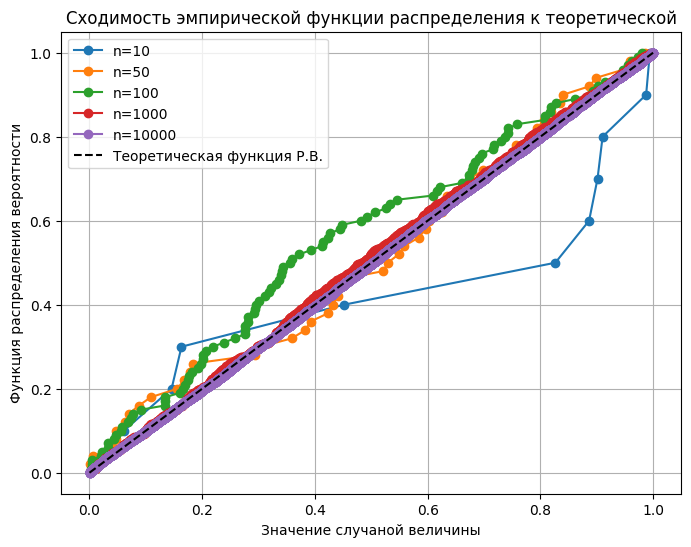

In [77]:
plt.figure(figsize=(8, 6))

for i, (samples, ecdf) in enumerate(empil_cdfs):
    plt.plot(samples, ecdf, label=f'n={sample_sizes[i]}', linestyle='-', marker='o')

x = np.linspace(0, 1, 100)
plt.plot(x, x, label='Теоретическая функция Р.В.', linestyle='--', color='black')
plt.xlabel('Значение случаной величины')
plt.ylabel('Функция распределения вероятности')
plt.title('Сходимость эмпирической функции распределения к теоретической')
plt.legend()
plt.grid(True)
plt.show()

Так же покажем сходимость выборочных характеристик, в нашем случае  - среднего и дисперссии 

In [78]:
num_samples = 5
sample_sizes = [10, 50, 100, 1000, 10000]
empil_cdfs = []

In [79]:
sample_means = []
sample_varins = []

# Теоретические значения среднего и дисперсии для равномерного распределения на [0, 1]
theo_mean = 0.5
theo_variance = 1 / 12

for size in sample_sizes:
    samples = np.random.uniform(0, 1, (num_samples, size))
    ecdfs = np.sort(samples, axis=1).cumsum(axis=1) / np.arange(1, size + 1)
    empil_cdfs.append(ecdfs)
    
    # Вычисление выборочных средних и дисперсий для каждого размера выборки
    sample_means.append(np.mean(samples, axis=1))
    sample_varins.append(np.var(samples, axis=1))

Визуализируем данные 

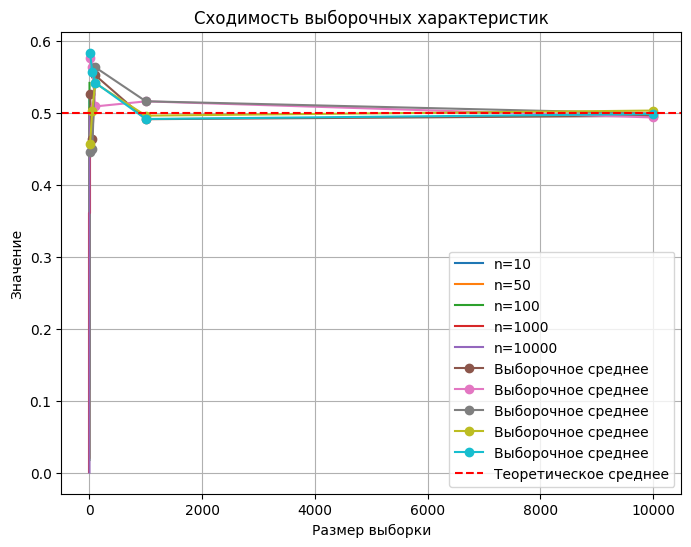

In [80]:
plt.figure(figsize=(8, 6))

# Графики эмпирической функции распределения
for i, size in enumerate(sample_sizes):
    ecdfs = empil_cdfs[i]
    mean_ecdf = np.mean(ecdfs, axis=0)
    plt.plot(np.linspace(0, 1, size), mean_ecdf, label=f'n={size}')

plt.plot(sample_sizes, sample_means, label='Выборочное среднее', linestyle='-', marker='o') # Графики средних значений

plt.axhline(y=theo_mean, color='r', linestyle='--', label='Теоретическое среднее') # Теоретические значения среднего и дисперсии

plt.xlabel('Размер выборки')
plt.ylabel('Значение')
plt.title('Сходимость выборочных характеристик')
plt.legend()
plt.grid(True)
plt.show()

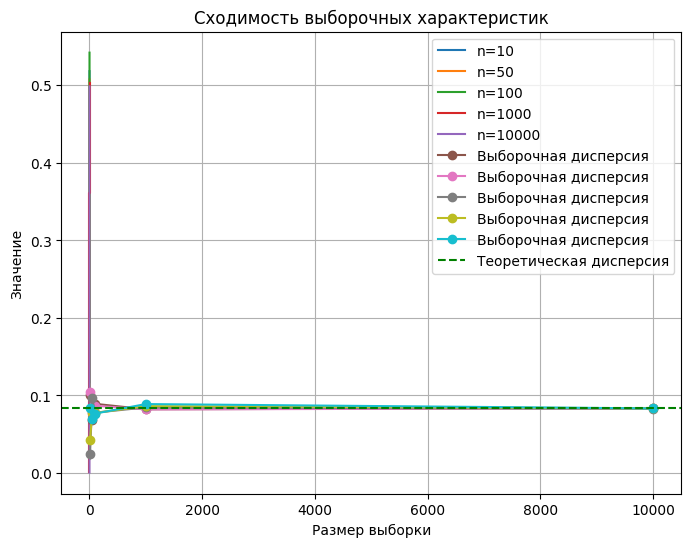

In [81]:
plt.figure(figsize=(8, 6))

# Графики эмпирической функции распределения
for i, size in enumerate(sample_sizes):
    ecdfs = empil_cdfs[i]
    mean_ecdf = np.mean(ecdfs, axis=0)
    plt.plot(np.linspace(0, 1, size), mean_ecdf, label=f'n={size}')

plt.plot(sample_sizes, sample_varins, label='Выборочная дисперсия', linestyle='-', marker='o') # Графики дисперсий

plt.axhline(y=theo_variance, color='g', linestyle='--', label='Теоретическая дисперсия') # Теоретические значения среднего и дисперсии

plt.xlabel('Размер выборки')
plt.ylabel('Значение')
plt.title('Сходимость выборочных характеристик')
plt.legend()
plt.grid(True)
plt.show()